<b>¡Hola Hiram!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


### Sprint 11 - Proyecto
Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

# Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?

# Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

# Los usuarios se dividen en tres grupos: dos grupos de control obtienen las fuentes antiguas y un grupo de prueba obtiene las nuevas. Descubre qué conjunto de fuentes produce mejores resultados.

# Crear dos grupos A tiene ciertas ventajas. Podemos establecer el principio de que solo confiaremos en la exactitud de nuestras pruebas cuando los dos grupos de control sean similares. Si hay diferencias significativas entre los grupos A, esto puede ayudarnos a descubrir factores que pueden estar distorsionando los resultados. La comparación de grupos de control también nos dice cuánto tiempo y datos necesitaremos cuando realicemos más tests.

# Utilizarás el mismo dataset para el análisis general y para el análisis A/A/B. En proyectos reales, los experimentos se llevan a cabo constantemente. El equipo de análisis estudia la calidad de una aplicación utilizando datos generales, sin prestar atención a si los usuarios participan en experimentos.

## Descripción de los datos
Cada entrada de registro es una acción de usuario o un evento.

$ EventName:$ nombre del evento.

$ DeviceIDHash:$ identificador de usuario unívoco.

$ EventTimestamp: $ hora del evento.

$ ExpId:$ número de experimento. 246 y 247 son los grupos de control, y 248 es el grupo de prueba.

## Paso 1. Abrir el archivo de datos y leer la información general

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
pd.set_option('display.max_columns', None)
import math

In [2]:
data=pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has cargado y visualizado los datos correctamente. Esto es fundamental para familiarizarte con el conjunto de datos y entender su estructura y contenido, lo cual es clave para cualquier análisis posterior.
</div>


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has utilizado <code>data.info()</code> para revisar el tipo de datos y la presencia de valores nulos. Para asegurar la calidad de los datos, considera verificar la existencia de duplicados, ya que estos pueden sesgar los resultados del análisis.
<pre><code>if data.duplicated().sum() > 0:
    print('Hay duplicados en los datos')
else:
    print('No hay duplicados en los datos')</code></pre>
</div>


In [5]:
data.describe()

,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


## Paso 2. Preparar los datos para el análisis

In [6]:
data.rename(columns={
    'EventName':'event',
    'DeviceIDHash':'user',
    'EventTimestamp':'timestamp',
    'ExpId':'exp_id'
}, inplace=True)
data.head()

,event,user,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [7]:
data['date_time']=pd.to_datetime(data['timestamp'], unit='s')
data['date']=data['date_time'].dt.floor('1D')
data.head()

,event,user,timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Has convertido correctamente el timestamp a un formato de fecha más legible. Esta conversión es crucial para realizar un análisis temporal de los eventos, permitiéndote identificar patrones y tendencias en los datos.
</div>


## Paso 3. Estudiar y comprobar los datos

In [8]:
#¿Cuántos eventos hay en los registros?
events=len(data)

In [9]:
#¿Cuántos usuarios hay en los registros?
users=len(data['user'].unique())

<div class="alert alert-block alert-warning">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Al calcular el número de usuarios únicos, es recomendable revisar si hay usuarios con un número inusualmente alto de eventos. Esto podría indicar comportamientos atípicos o errores en los datos que podrían afectar tus análisis.
<pre><code>data['user'].value_counts().head()</code></pre>
</div>


In [10]:
#¿Cuál es el promedio de eventos por usuario?
events_per_users=events/users

In [11]:
#eventos que hay en los registros
print(f'{events} events')

244126 events


In [12]:
#usuarios que hay en los registros
print(f'{users} users')

7551 users


In [13]:
# promedio de eventos por usuario
print(f'{events/users} events_per_users')

32.33028737915508 events_per_users


<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
Has calculado correctamente el promedio de eventos por usuario. Esta métrica es útil para entender el comportamiento promedio de los usuarios en la aplicación y puede ayudar a identificar patrones de uso.
</div>


¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. 

¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. 

¿Qué periodo representan realmente los datos?

In [14]:
#fecha maxima y minima
print(data['date_time'].min(), data['date_time'].max())

2019-07-25 04:43:36 2019-08-07 21:15:17


In [15]:
data.head()

,event,user,timestamp,exp_id,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


<AxesSubplot:>

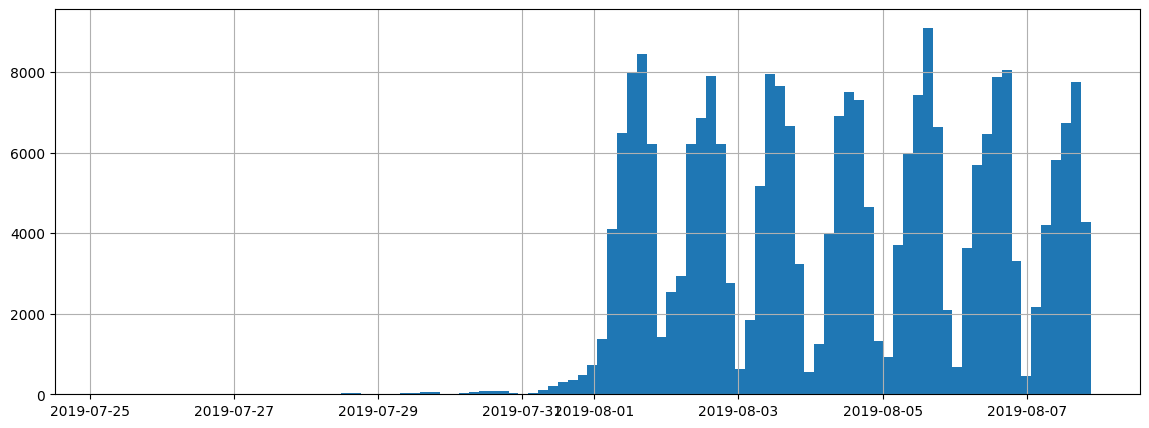

In [16]:
register_matplotlib_converters()
data['date_time'].hist(bins=100, figsize=(14,5))

<div class="alert alert-block alert-warning">
<b>Celda [16]</b> <a class="tocSkip"></a><br>
El histograma de <code>date_time</code> es útil para visualizar la distribución de los eventos a lo largo del tiempo. Incluir una línea de tendencia o analizar la estacionalidad podría proporcionar información adicional sobre patrones temporales en los datos.
</div>


array([[<AxesSubplot:title={'center':'user'}>,
        <AxesSubplot:title={'center':'timestamp'}>],
       [<AxesSubplot:title={'center':'exp_id'}>,
        <AxesSubplot:title={'center':'date_time'}>],
       [<AxesSubplot:title={'center':'date'}>, <AxesSubplot:>]],
      dtype=object)

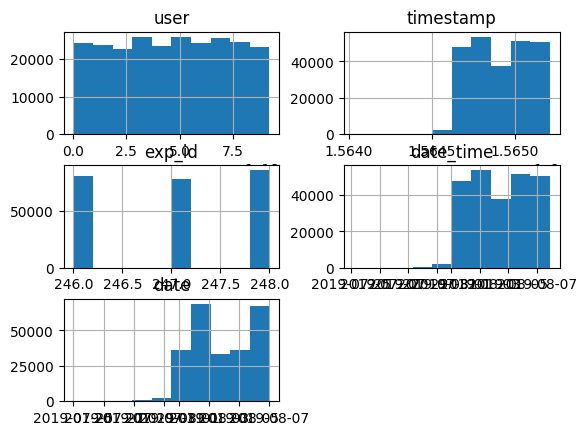

In [17]:
data.hist()

<AxesSubplot:xlabel='date'>

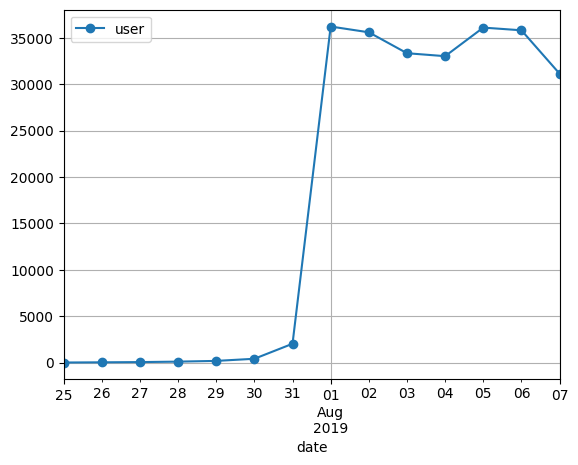

In [18]:
#Encuentra el momento en que los datoto empiesan a estar completos
data.pivot_table(
    index='date',
    values='user',
    aggfunc='count'
).plot(style='o-',grid=True)

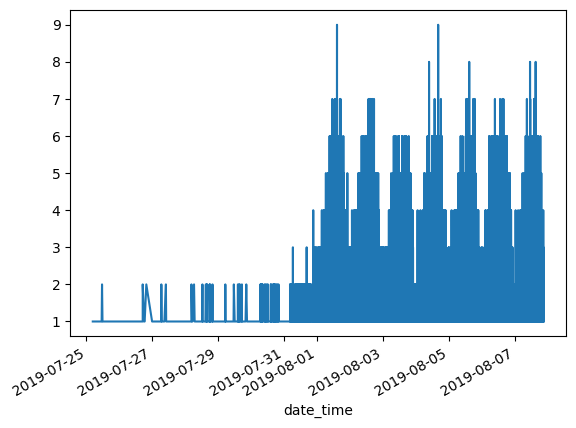

,event,user,timestamp,exp_id,date_time,date
1990,MainScreenAppear,7701922487875823903,1564606857,247,2019-07-31 21:00:57,2019-07-31
1991,MainScreenAppear,2539077412200498909,1564606905,247,2019-07-31 21:01:45,2019-07-31
1992,OffersScreenAppear,3286987355161301427,1564606941,248,2019-07-31 21:02:21,2019-07-31
1993,OffersScreenAppear,3187166762535343300,1564606943,247,2019-07-31 21:02:23,2019-07-31
1994,MainScreenAppear,1118952406011435924,1564607005,248,2019-07-31 21:03:25,2019-07-31


In [19]:
data.groupby('date_time')['user'].count().plot()
plt.show()
data.query('date_time>"2019-07-31 21:00"',inplace=True)
data.head()

<div class="alert alert-block alert-success">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
Has identificado correctamente el periodo en el que los datos son más completos. Esto es crucial para garantizar que las conclusiones que extraigas sean representativas y precisas.
</div>


<AxesSubplot:>

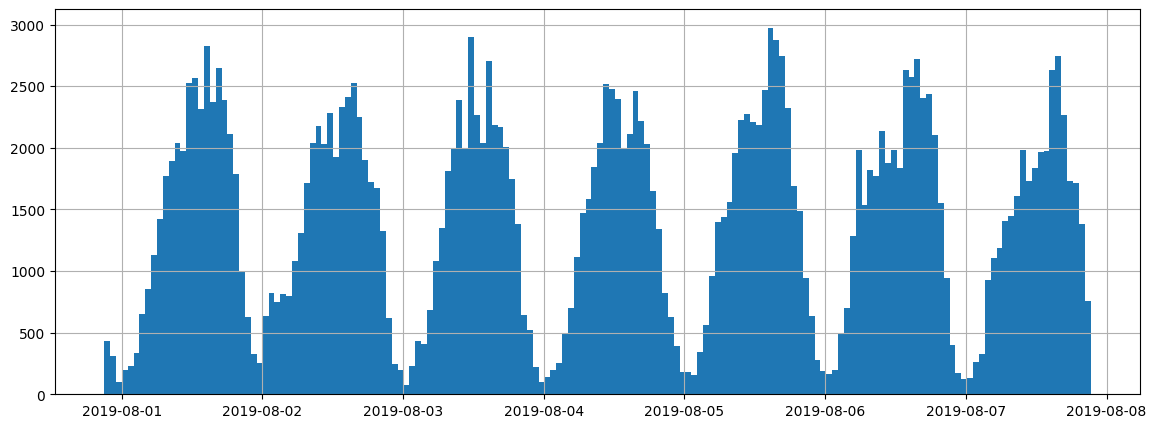

In [20]:
#¿Qué periodo representan realmente los datos?
data['date_time'].hist(bins=7*24, figsize=(14,5))

In [21]:
#¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
events=len(data)
user=len(data['user'].unique())
events_per_user=events/users
print(events)
print(users)
print(events_per_user)

242136
7551
32.06674612634088


In [22]:
#Asegúrate de tener usuarios de los tres grupos experimentales.
data

,event,user,timestamp,exp_id,date_time,date
1990,MainScreenAppear,7701922487875823903,1564606857,247,2019-07-31 21:00:57,2019-07-31
1991,MainScreenAppear,2539077412200498909,1564606905,247,2019-07-31 21:01:45,2019-07-31
1992,OffersScreenAppear,3286987355161301427,1564606941,248,2019-07-31 21:02:21,2019-07-31
1993,OffersScreenAppear,3187166762535343300,1564606943,247,2019-07-31 21:02:23,2019-07-31
1994,MainScreenAppear,1118952406011435924,1564607005,248,2019-07-31 21:03:25,2019-07-31
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [23]:
data['exp_id'].value_counts()

248    85039
246    79679
247    77418
Name: exp_id, dtype: int64

<div class="alert alert-block alert-success">
<b>Celda [23]</b> <a class="tocSkip"></a><br>
Has verificado correctamente que los datos contienen usuarios de los tres grupos experimentales. Esto es esencial para asegurar que el análisis posterior sea válido y que las comparaciones entre grupos sean significativas.
</div>


# Paso 4. Estudiar el embudo de eventos

In [24]:
#Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.
data.pivot_table(
    index='event',
    values='user',
    aggfunc='count'
).sort_values('user', ascending=False)

,user
event,
MainScreenAppear,117992
OffersScreenAppear,46548
CartScreenAppear,42406
PaymentScreenSuccessful,34146
Tutorial,1044


In [25]:
#Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.
users_per_event=data.pivot_table(
    index='event',
    values='user',
    aggfunc='nunique'
).sort_values('user', ascending=False)
users_per_event.head()

,user
event,
MainScreenAppear,7423
OffersScreenAppear,4597
CartScreenAppear,3736
PaymentScreenSuccessful,3540
Tutorial,843


In [26]:
#Calcula la proporción de usuarios que realizaron la acción al menos una vez.
users_per_event/ len(data['user'].unique()) 

,user
event,
MainScreenAppear,0.984744
OffersScreenAppear,0.609843
CartScreenAppear,0.495622
PaymentScreenSuccessful,0.469621
Tutorial,0.111833


<div class="alert alert-block alert-success">
<b>Celda [26]</b> <a class="tocSkip"></a><br>
El cálculo de la proporción de usuarios que realizaron cada acción es una excelente manera de entender el embudo de conversión. Esto te ayuda a visualizar cómo los usuarios interactúan con la aplicación y en qué etapas se pierden.
</div>


# ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.


 Si es nesesario tenerlas encuenta

esta es la sescuencia de mayor a menor por usuarios
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful	

Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [27]:
usuarios_evento_1 = data.query('event == "MainScreenAppear"')[['user']].drop_duplicates()
usuarios_evento_2 = (
    data
    .query('event == "OffersScreenAppear"')
    .query(f'user.isin({tuple(usuarios_evento_1["user"].values)})')
    [['user']].drop_duplicates()
)
usuarios_evento_3 = (
    data
    .query('event == "CartScreenAppear"')
    .query(f'user.isin({tuple(usuarios_evento_2["user"].values)})')
    [['user']].drop_duplicates()
)

usuarios_evento_4 = (
    data
    .query('event == "PaymentScreenSuccessful"')
    .query(f'user.isin({tuple(usuarios_evento_3["user"].values)})')
    [['user']].drop_duplicates()
)

usuarios_old=pd.DataFrame(
    {
        'event':['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful'],
        'n_usuarios':[usuarios_evento_1['user'].count(),usuarios_evento_2['user'].count(),usuarios_evento_3['user'].count(),usuarios_evento_4['user'].count(),]
    }
)

¿En qué etapa pierdes más usuarios?

COSIDERANDO ESTOS DATOS 

In [28]:
#usuarios viejos o retenidos
usuarios_old

,event,n_usuarios
0,MainScreenAppear,7423
1,OffersScreenAppear,4486
2,CartScreenAppear,3581
3,PaymentScreenSuccessful,3430


In [29]:
#proporcion de usuarios que pasan de una etapa ala sigiente
usuarios_embudo=usuarios_old
usuarios_embudo

,event,n_usuarios
0,MainScreenAppear,7423
1,OffersScreenAppear,4486
2,CartScreenAppear,3581
3,PaymentScreenSuccessful,3430


In [30]:
usuarios_embudo['proporcion']=usuarios_embudo['n_usuarios']/usuarios_embudo['n_usuarios'].shift()
usuarios_embudo

,event,n_usuarios,proporcion
0,MainScreenAppear,7423,NaN
1,OffersScreenAppear,4486,0.604338
2,CartScreenAppear,3581,0.798261
3,PaymentScreenSuccessful,3430,0.957833


<div class="alert alert-block alert-warning">
<b>Celda [30]</b> <a class="tocSkip"></a><br>
El cálculo de las proporciones de usuarios que pasan de una etapa a la siguiente es correcto. Una visualización de este embudo facilitaría la interpretación de los resultados, permitiendo identificar mejor las áreas de mejora en el proceso de conversión.
<pre><code>usuarios_embudo.plot(kind='bar', x='event', y='proporcion', legend=False)
plt.title('Proporción de usuarios en cada etapa del embudo')
plt.ylabel('Proporción')
plt.show()</code></pre>
</div>


dela primera ala segunda etapa de (7423) a(4486) se pierde el 40% delos usuarios
delas segunda ala tercera se perde el 21%
dela tercera a la cuarta se pierde solo el 5%

In [31]:
#LOS USUARIOS PERDIDOS
lost_users=([usuarios_old['n_usuarios'][0] - usuarios_old['n_usuarios'][1]],[usuarios_old['n_usuarios'][1] - usuarios_old['n_usuarios'][2]],[usuarios_old['n_usuarios'][2] - usuarios_old['n_usuarios'][3]])
lost_users

([2937], [905], [151])

 SE PIERDE MAS EN LA PRIMERA ETAPA
 1. 2937
 2. 905
 3. 151

## ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [32]:
print('porcentaje de usuarios que viajan del primer evento hasta el final')
usuarios_embudo.loc[3,'n_usuarios']/usuarios_embudo.loc[0,'n_usuarios']

porcentaje de usuarios que viajan del primer evento hasta el final


0.4620773272261889

porcentaje de usuarios queviajan del primer evento hasta el final

In [33]:
data.head()

,event,user,timestamp,exp_id,date_time,date
1990,MainScreenAppear,7701922487875823903,1564606857,247,2019-07-31 21:00:57,2019-07-31
1991,MainScreenAppear,2539077412200498909,1564606905,247,2019-07-31 21:01:45,2019-07-31
1992,OffersScreenAppear,3286987355161301427,1564606941,248,2019-07-31 21:02:21,2019-07-31
1993,OffersScreenAppear,3187166762535343300,1564606943,247,2019-07-31 21:02:23,2019-07-31
1994,MainScreenAppear,1118952406011435924,1564607005,248,2019-07-31 21:03:25,2019-07-31


## Paso 5. Estudiar los resultados del experimento

In [34]:
users_per_group=data.pivot_table(
    index='exp_id',values='user',aggfunc='nunique')
users_per_group

,user
exp_id,
246,2484
247,2517
248,2537


# Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

In [35]:
users_events_per_group=data.pivot_table(
    index='event',values='user',columns='exp_id',aggfunc='nunique')
users_events_per_group

exp_id,246,247,248
event,,,
CartScreenAppear,1266,1239,1231
MainScreenAppear,2450,2479,2494
OffersScreenAppear,1542,1524,1531
PaymentScreenSuccessful,1200,1158,1182
Tutorial,278,284,281


# Selecciona el evento más popular. En cada uno de los grupos de control,

# encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. 

# Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [36]:
data['event'].value_counts()

MainScreenAppear           117992
OffersScreenAppear          46548
CartScreenAppear            42406
PaymentScreenSuccessful     34146
Tutorial                     1044
Name: event, dtype: int64

In [37]:
data['event'] == 'MainScreenAppear'         

1990       True
1991       True
1992      False
1993      False
1994       True
          ...  
244121     True
244122     True
244123     True
244124     True
244125    False
Name: event, Length: 242136, dtype: bool

In [38]:
datos_de_eventos_mas_popular=data[data['event'] == 'MainScreenAppear']
datos_de_eventos_mas_popular

,event,user,timestamp,exp_id,date_time,date
1990,MainScreenAppear,7701922487875823903,1564606857,247,2019-07-31 21:00:57,2019-07-31
1991,MainScreenAppear,2539077412200498909,1564606905,247,2019-07-31 21:01:45,2019-07-31
1994,MainScreenAppear,1118952406011435924,1564607005,248,2019-07-31 21:03:25,2019-07-31
1995,MainScreenAppear,929387516286850088,1564607135,248,2019-07-31 21:05:35,2019-07-31
1998,MainScreenAppear,7701922487875823903,1564607247,247,2019-07-31 21:07:27,2019-07-31
...,...,...,...,...,...,...
244120,MainScreenAppear,5746969938801999050,1565212331,246,2019-08-07 21:12:11,2019-08-07
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07


In [39]:
#encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción.
usuarios_que_ralizarion_accion=datos_de_eventos_mas_popular.groupby('exp_id')['user'].nunique()
usuarios_que_ralizarion_accion

exp_id
246    2450
247    2479
248    2494
Name: user, dtype: int64

In [40]:
#usuarios_que_ralizarion_accion[]/usuarios_que_ralizarion_accio[]

In [41]:
usuarios_embudo['proporcion']=usuarios_embudo['n_usuarios']/usuarios_embudo['n_usuarios'].shift()
usuarios_embudo

,event,n_usuarios,proporcion
0,MainScreenAppear,7423,NaN
1,OffersScreenAppear,4486,0.604338
2,CartScreenAppear,3581,0.798261
3,PaymentScreenSuccessful,3430,0.957833


In [42]:
data.groupby(['event', 'exp_id'])['user'].nunique().unstack()

exp_id,246,247,248
event,,,
CartScreenAppear,1266,1239,1231
MainScreenAppear,2450,2479,2494
OffersScreenAppear,1542,1524,1531
PaymentScreenSuccessful,1200,1158,1182
Tutorial,278,284,281


In [43]:
users_events_per_group

exp_id,246,247,248
event,,,
CartScreenAppear,1266,1239,1231
MainScreenAppear,2450,2479,2494
OffersScreenAppear,1542,1524,1531
PaymentScreenSuccessful,1200,1158,1182
Tutorial,278,284,281


In [44]:
from scipy import stats
import numpy as np
import math

In [45]:
#funcion Z test
def check_hipotesis(succeses1, succeses2, trials1, trials2, alpha=0.1):

    ##Proporcion de exitos primer grupo
    p1=succeses1/trials1
    #Proporcion de exitos segundogrupo
    p2=succeses2/trials2
    #Proporcion de exitos combinada
    p_combined=(succeses1+succeses2)/(trials1+trials2)
    #Diferencia de Proporciones
    diferencia=p1 - p2
    #valorZ
    z_value=diferencia/math.sqrt(p_combined*(1/trials1 +1/trials2 ) )
    #distribucion NORMAL
    distr=stats.norm(0,1)
    p_value=(1-distr.cdf(abs(z_value)))*2
    print('p_value', p_value)
    if(p_value<alpha):
        print('rechasamos la hipotesis nula.')
    else:
        print('no podemos rechasar la hipotesis nula.')

In [46]:
check_hipotesis(users_events_per_group.loc['MainScreenAppear', 246],
               users_events_per_group.loc['MainScreenAppear', 247],
               users_per_group.loc[246],
               users_per_group.loc[247])

p_value [0.95995633]
no podemos rechasar la hipotesis nula.


In [47]:
def check_events_hipotesis(users_events_per_group,
                         users_per_group,
                         event,
                         exp1,
                         exp2):
    frac1=users_events_per_group.loc[event,exp1]/users_per_group.loc[exp1]
    frac2=users_events_per_group.loc[event,exp2]/users_per_group.loc[exp2]
    print(f'{frac1} con {event} evento del grupo {exp1}')
    print(f'{frac2} con {event} evento del grupo {exp2}')
    check_hipotesis(users_events_per_group.loc[event,exp1],
                users_events_per_group.loc[event,exp2],
                users_per_group.loc[exp1],
                users_per_group.loc[exp2])

In [48]:
for event in users_events_per_group.index:
    check_events_hipotesis(users_events_per_group, users_per_group, event, 246,247)
    print()

user    0.509662
Name: 246, dtype: float64 con CartScreenAppear evento del grupo 246
user    0.492253
Name: 247, dtype: float64 con CartScreenAppear evento del grupo 247
p_value [0.38444058]
no podemos rechasar la hipotesis nula.

user    0.986312
Name: 246, dtype: float64 con MainScreenAppear evento del grupo 246
user    0.984903
Name: 247, dtype: float64 con MainScreenAppear evento del grupo 247
p_value [0.95995633]
no podemos rechasar la hipotesis nula.

user    0.620773
Name: 246, dtype: float64 con OffersScreenAppear evento del grupo 246
user    0.605483
Name: 247, dtype: float64 con OffersScreenAppear evento del grupo 247
p_value [0.48989816]
no podemos rechasar la hipotesis nula.

user    0.483092
Name: 246, dtype: float64 con PaymentScreenSuccessful evento del grupo 246
user    0.460072
Name: 247, dtype: float64 con PaymentScreenSuccessful evento del grupo 247
p_value [0.23586897]
no podemos rechasar la hipotesis nula.

user    0.111916
Name: 246, dtype: float64 con Tutorial ev

<div class="alert alert-block alert-success">
<b>Celda [48]</b> <a class="tocSkip"></a><br>
Has implementado correctamente un Z-test para comparar las proporciones de éxito entre grupos experimentales. Este análisis es fundamental para validar diferencias estadísticas entre grupos y asegurar que los resultados sean significativos.
</div>


# Haz lo mismo para el grupo con fuentes alteradas.
Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. 
Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [49]:
for event in users_events_per_group.index:
    check_events_hipotesis(users_events_per_group, users_per_group, event, 246,248)
    print()

user    0.509662
Name: 246, dtype: float64 con CartScreenAppear evento del grupo 246
user    0.485219
Name: 248, dtype: float64 con CartScreenAppear evento del grupo 248
p_value [0.21946373]
no podemos rechasar la hipotesis nula.

user    0.986312
Name: 246, dtype: float64 con MainScreenAppear evento del grupo 246
user    0.983051
Name: 248, dtype: float64 con MainScreenAppear evento del grupo 248
p_value [0.90729982]
no podemos rechasar la hipotesis nula.

user    0.620773
Name: 246, dtype: float64 con OffersScreenAppear evento del grupo 246
user    0.603469
Name: 248, dtype: float64 con OffersScreenAppear evento del grupo 248
p_value [0.4332601]
no podemos rechasar la hipotesis nula.

user    0.483092
Name: 246, dtype: float64 con PaymentScreenSuccessful evento del grupo 246
user    0.465905
Name: 248, dtype: float64 con PaymentScreenSuccessful evento del grupo 248
p_value [0.37667709]
no podemos rechasar la hipotesis nula.

user    0.111916
Name: 246, dtype: float64 con Tutorial eve

In [50]:
for event in users_events_per_group.index:
    check_events_hipotesis(users_events_per_group, users_per_group, event, 247,248)
    print()

user    0.492253
Name: 247, dtype: float64 con CartScreenAppear evento del grupo 247
user    0.485219
Name: 248, dtype: float64 con CartScreenAppear evento del grupo 248
p_value [0.72060986]
no podemos rechasar la hipotesis nula.

user    0.984903
Name: 247, dtype: float64 con MainScreenAppear evento del grupo 247
user    0.983051
Name: 248, dtype: float64 con MainScreenAppear evento del grupo 248
p_value [0.9470932]
no podemos rechasar la hipotesis nula.

user    0.605483
Name: 247, dtype: float64 con OffersScreenAppear evento del grupo 247
user    0.603469
Name: 248, dtype: float64 con OffersScreenAppear evento del grupo 248
p_value [0.92663415]
no podemos rechasar la hipotesis nula.

user    0.460072
Name: 247, dtype: float64 con PaymentScreenSuccessful evento del grupo 247
user    0.465905
Name: 248, dtype: float64 con PaymentScreenSuccessful evento del grupo 248
p_value [0.76058357]
no podemos rechasar la hipotesis nula.

user    0.112833
Name: 247, dtype: float64 con Tutorial eve

<div class="alert alert-block alert-warning">
<b>Celda [50]</b> <a class="tocSkip"></a><br>
Al realizar pruebas de hipótesis, es importante revisar los supuestos de normalidad y homocedasticidad. Aunque el Z-test es robusto, verificar estos supuestos puede aumentar la confianza en los resultados obtenidos.
</div>


In [51]:
users_events_per_group_control=users_events_per_group.copy()
users_events_per_group_control.loc[:, 247]+=users_events_per_group_control.loc[:, 246]
users_events_per_group_control.drop(columns=246, inplace=True)
users_events_per_group_control

exp_id,247,248
event,,
CartScreenAppear,2505,1231
MainScreenAppear,4929,2494
OffersScreenAppear,3066,1531
PaymentScreenSuccessful,2358,1182
Tutorial,562,281


In [52]:
users_per_group_control=users_per_group.copy()
users_per_group_control.loc[247]+=users_per_group_control.loc[246]
users_per_group_control.drop(246, inplace=True)
users_per_group_control

,user
exp_id,
247,5001
248,2537


In [53]:
for event in users_events_per_group.index:
    check_events_hipotesis(users_events_per_group, users_per_group, event, 247,248)
    print()

user    0.492253
Name: 247, dtype: float64 con CartScreenAppear evento del grupo 247
user    0.485219
Name: 248, dtype: float64 con CartScreenAppear evento del grupo 248
p_value [0.72060986]
no podemos rechasar la hipotesis nula.

user    0.984903
Name: 247, dtype: float64 con MainScreenAppear evento del grupo 247
user    0.983051
Name: 248, dtype: float64 con MainScreenAppear evento del grupo 248
p_value [0.9470932]
no podemos rechasar la hipotesis nula.

user    0.605483
Name: 247, dtype: float64 con OffersScreenAppear evento del grupo 247
user    0.603469
Name: 248, dtype: float64 con OffersScreenAppear evento del grupo 248
p_value [0.92663415]
no podemos rechasar la hipotesis nula.

user    0.460072
Name: 247, dtype: float64 con PaymentScreenSuccessful evento del grupo 247
user    0.465905
Name: 248, dtype: float64 con PaymentScreenSuccessful evento del grupo 248
p_value [0.76058357]
no podemos rechasar la hipotesis nula.

user    0.112833
Name: 247, dtype: float64 con Tutorial eve

## ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones.

## Con α = 0.1, uno de cada 10 resultados podría dar un falso positivo (rechazar la hipótesis nula cuando es verdadera).


Con 20 pruebas, se espera en promedio:

## 20 × 0.1 = 2 resultados falsamente significativos

Eso implica que puedes tener resultados engañosamente significativos simplemente por azar.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Hiram! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Carga y visualización inicial de datos bien ejecutada.<br>
• Conversión adecuada de timestamps a formatos legibles.<br>
• Cálculo preciso de métricas descriptivas como el promedio de eventos por usuario.<br>
• Identificación correcta de periodos de datos completos.<br>
• Verificación de la presencia de usuarios en todos los grupos experimentales.<br>
• Cálculo detallado de proporciones de usuarios en el embudo de conversión.<br>
• Implementación efectiva de pruebas de hipótesis con Z-test.<br>
• Uso adecuado de funciones de agrupación y pivoteo para el análisis.<br>
• Buen manejo de visualizaciones para entender la distribución de eventos.<br>
• Estructuración clara y lógica del flujo de análisis.<br>
¡Felicidades!
</div>
